In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see we have some missing values in this dataset and most of our features are object data types. Let's view the data dictionary image to see what those features represent.

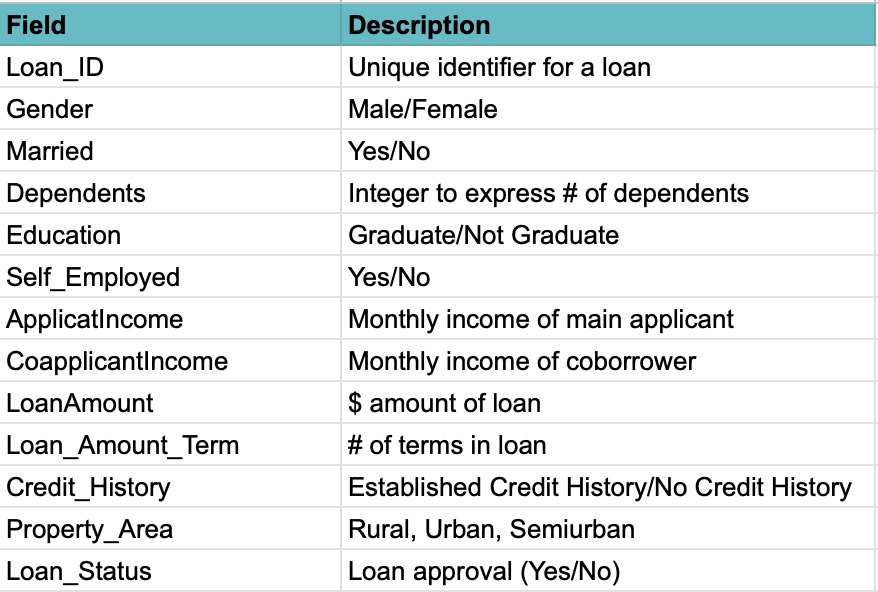

# Exploratory Data Analysis

## Univariate Feature

### Gender

In [4]:
df["Gender"].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

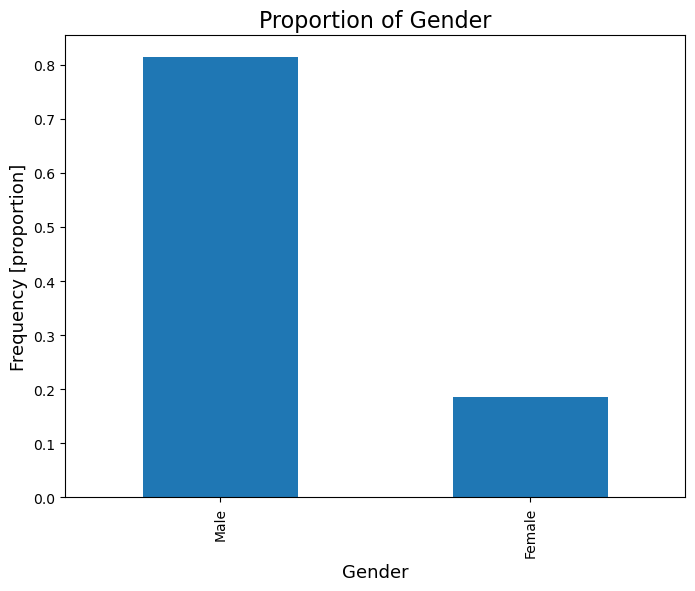

In [5]:
df["Gender"].value_counts(normalize=True).plot.bar(figsize=(8, 6))
plt.title("Proportion of Gender", size=16)
plt.xlabel("Gender", size=13)
plt.ylabel("Frequency [proportion]", size=13);

We can see from the above summary that approximately 80% of the gender are males and 20% are females. This could approach biases for our model as there is no balance between gender in the dataset.

### Married

In [6]:
df["Married"].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

There is a bit balance between the marital status. We can see that above half of the customers are married.

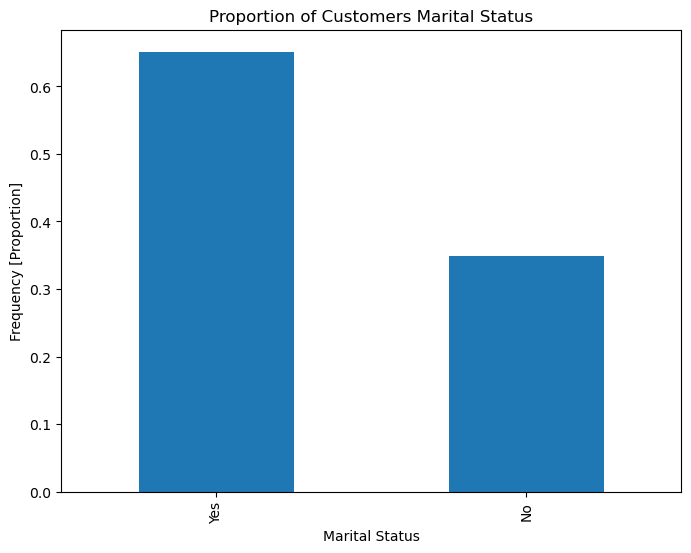

In [7]:
df["Married"].value_counts(normalize=True).plot.bar(figsize=(8, 6))
plt.title("Proportion of Customers Marital Status")
plt.ylabel("Frequency [Proportion]")
plt.xlabel("Marital Status");

### Dependents

In [8]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
df["Dependents"].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

Most of the customers have no dependents.

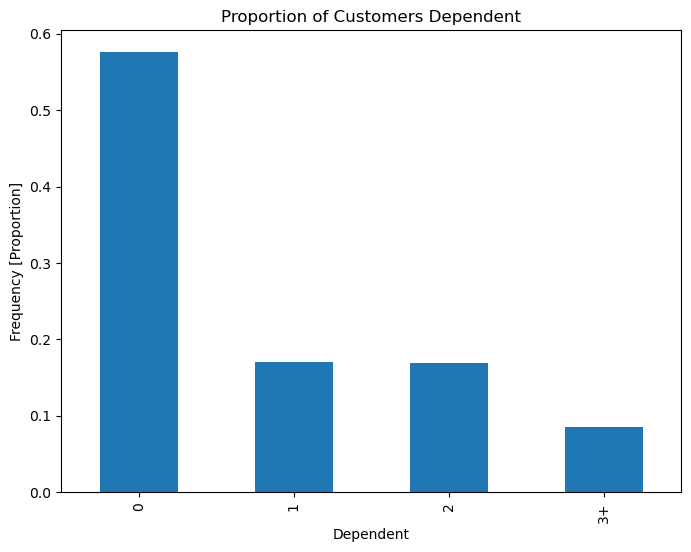

In [10]:
df["Dependents"].value_counts(normalize=True).plot.bar(figsize=(8, 6))
plt.title("Proportion of Customers Dependent")
plt.xlabel("Dependent")
plt.ylabel("Frequency [Proportion]");

### Education

In [11]:
df["Education"].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

Majority of the Customers are graduates.

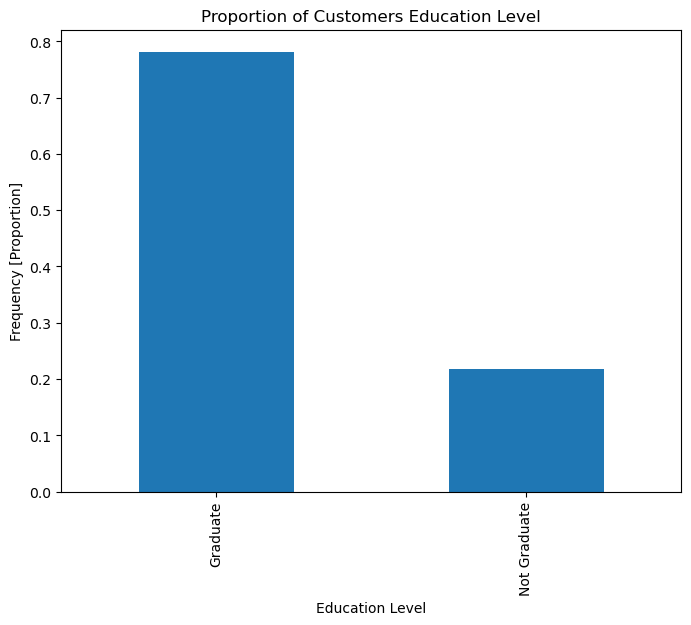

In [12]:
df["Education"].value_counts(normalize=True).plot.bar(figsize=(8, 6))
plt.xlabel("Education Level")
plt.ylabel("Frequency [Proportion]")
plt.title("Proportion of Customers Education Level");

Above 70% of customers are graduate.

### Self Employed

In [13]:
df["Self_Employed"].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

Majority of the customers are not self employed.

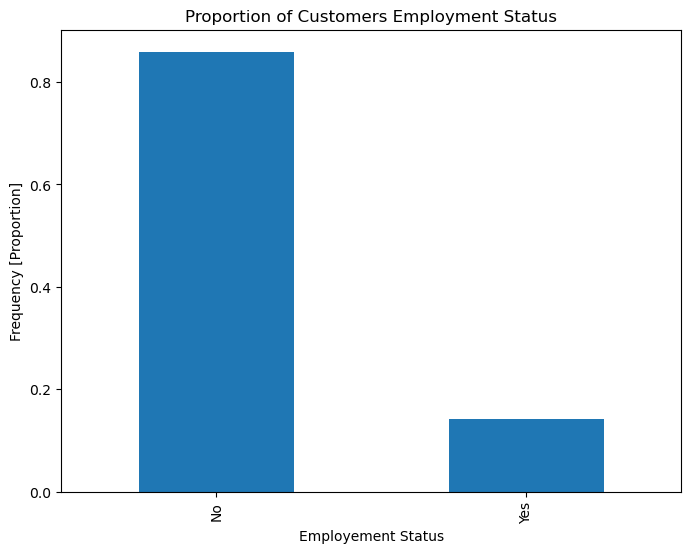

In [14]:
df["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(8, 6))
plt.xlabel("Employement Status")
plt.ylabel("Frequency [Proportion]")
plt.title("Proportion of Customers Employment Status");

### Applicant Income

In [15]:
df["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

We can see that most customers earn below \\$6k per month. Also interesting to see some customers that earn very low below \\$200 and some that earn above \\$80k per monthðŸ˜²ðŸ’µðŸ’µ.

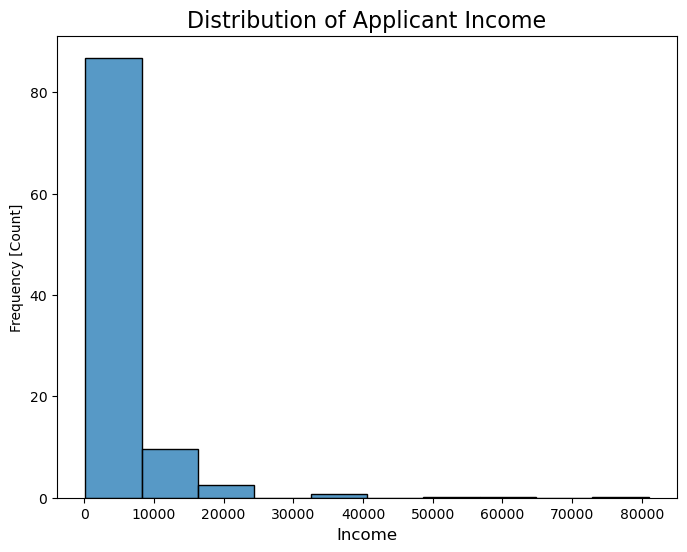

In [16]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(df["ApplicantIncome"], stat="percent", bins=10)
plt.title("Distribution of Applicant Income", size=16)
plt.xlabel("Income", size=12)
plt.ylabel("Frequency [Count]");

We can see that the distribution is rightly skewed. This is as a result of customers that earn way lot per month. Also above 80% of customers earn below \\$10k.

### Co Applicant

In [17]:
df["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

We can see from the above summary that we have some co-applicants that don't have income monthly. Also most of the co-applicants earn below 3000. We can also see some co-applicants they earn way much.

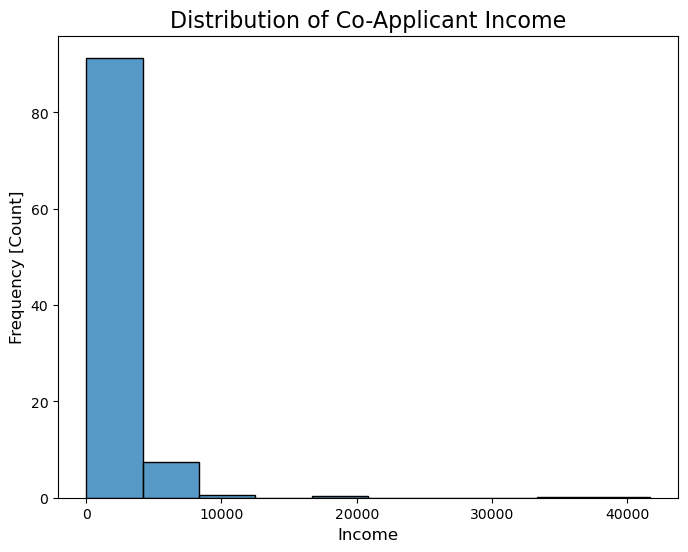

In [18]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(df["CoapplicantIncome"], stat="percent", bins=10)
plt.title("Distribution of Co-Applicant Income", size=16)
plt.xlabel("Income", size=12)
plt.ylabel("Frequency [Count]", size=12);

We can see that the distribution is rightly skewed. This is as a result of customers that earn way lot per month. Also above 80% of customers earn below \\$5k.

### Loan Amount

In [19]:
df["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

We can see from the above summary that most of the loan the applicants request for are above \\$100.

### Loan Amount Term

In [20]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

We can see that we have 10 unique loan terms. The minimum loan term is 12 months and the maximum is 480 months.

In [21]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

We can see that most of the loan term granted to applicants are mostly 360 months equivalent to 30 years, followed by 180 months (15 years).

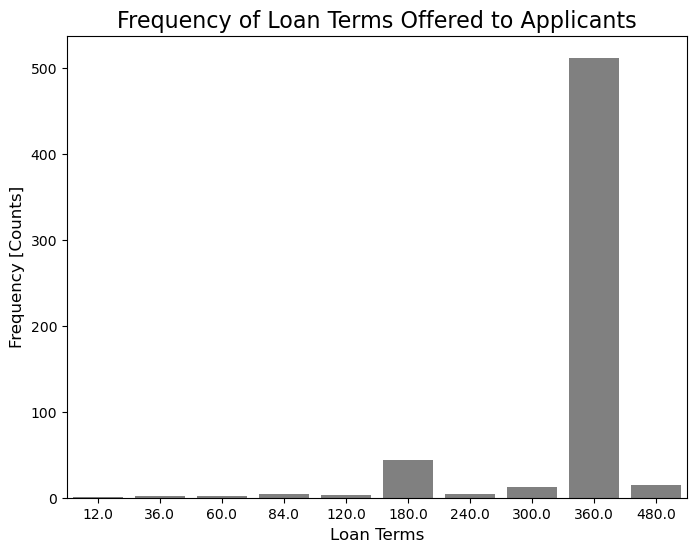

In [22]:
fig = plt.figure(figsize = (8, 6))
sns.countplot(data = df, x="Loan_Amount_Term", color="grey")
plt.title("Frequency of Loan Terms Offered to Applicants", size=16)
plt.xlabel("Loan Terms", size=12)
plt.ylabel("Frequency [Counts]", size=12);

Most of the customers applied for 360 months loan terms.

### Credit History

In [23]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [24]:
df["Credit_History"].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

Most of the Applicants have established credit history. Approximately 84% of applicants have.

### Property Area

In [25]:
df["Property_Area"].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

There is balance in applicants property area, but we can see that applicants have most of their property at semi urban area.

### Loan Status

In [26]:
df["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

We can see that there is a bit balance in the loan status. We can see the trade off as approximately 69% to 31%.

## Bivariate Analysis

### Gender VS Loan Status

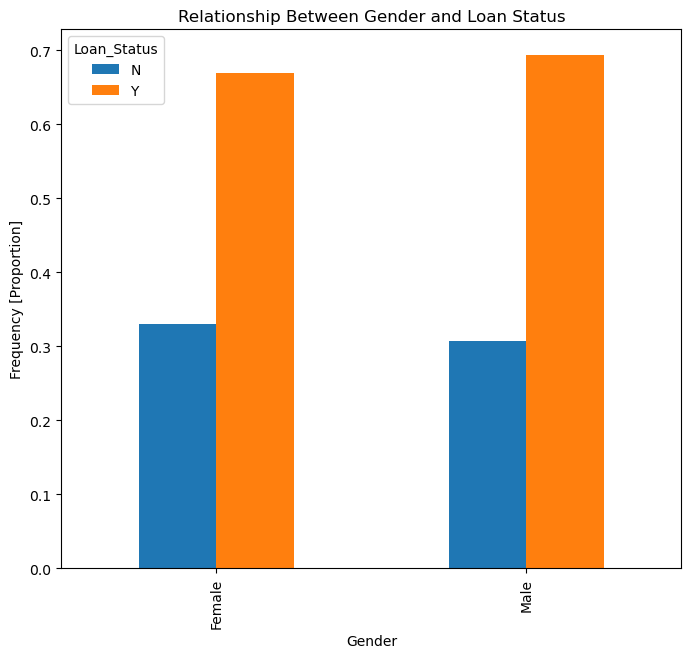

In [27]:
mask = pd.crosstab(df["Gender"], df["Loan_Status"]).apply(lambda x: x/x.sum(), axis=1)
mask.plot.bar(figsize=(8, 7))
plt.title("Relationship Between Gender and Loan Status")
plt.xlabel("Gender")
plt.ylabel("Frequency [Proportion]");

We can see that concerning granting loan based on gender. There isn't much of a difference. I.e. We can postulate that gender doesn't really determine if an applicant will be a loan or not.

### Married VS Loan Status

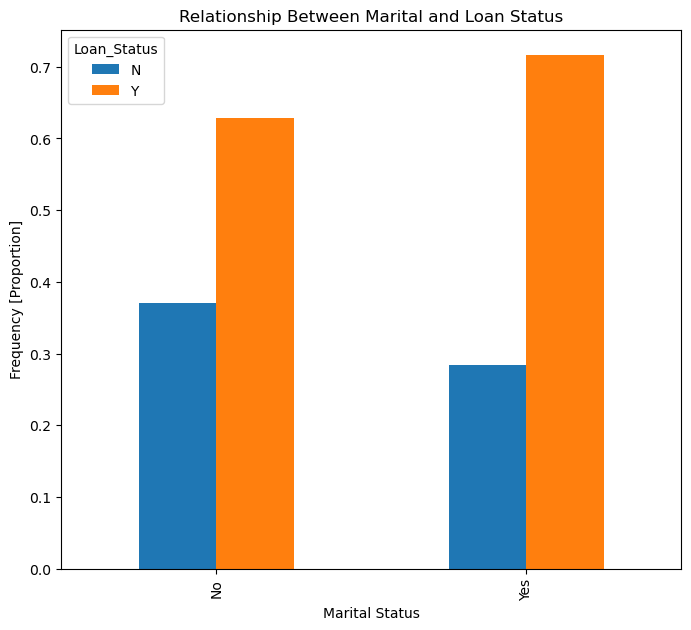

In [28]:
mask = pd.crosstab(df["Married"], df["Loan_Status"]).apply(lambda x: x/x.sum(), axis=1)
mask.plot.bar(figsize=(8, 7))
plt.title("Relationship Between Marital and Loan Status")
plt.xlabel("Marital Status")
plt.ylabel("Frequency [Proportion]");

Also concerning marital status. There isn't much of difference concerning loan and marital status. I.e. An applicant marital status does not necessarily guarantee whether he/she will recieve a loan. 

Though we can see that the proportion of applicants that are married and who got the loan are 10% above those who didn't got married but were given the loan.

### Dependents VS Loan Status

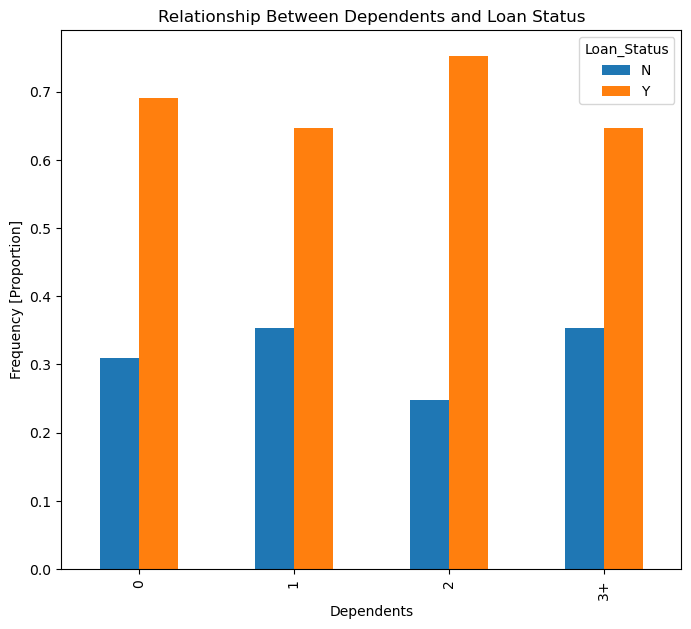

In [29]:
mask = pd.crosstab(df["Dependents"], df["Loan_Status"]).apply(lambda x: x/x.sum(), axis=1)
mask.plot.bar(figsize=(8, 7))
plt.title("Relationship Between Dependents and Loan Status")
plt.xlabel("Dependents")
plt.ylabel("Frequency [Proportion]");

Also concerning the dependents feature. There isn't much relationship as well, but we can see that those applicants that had 2 dependents tends to be given the loan than the others.

### Education VS Loan Status.

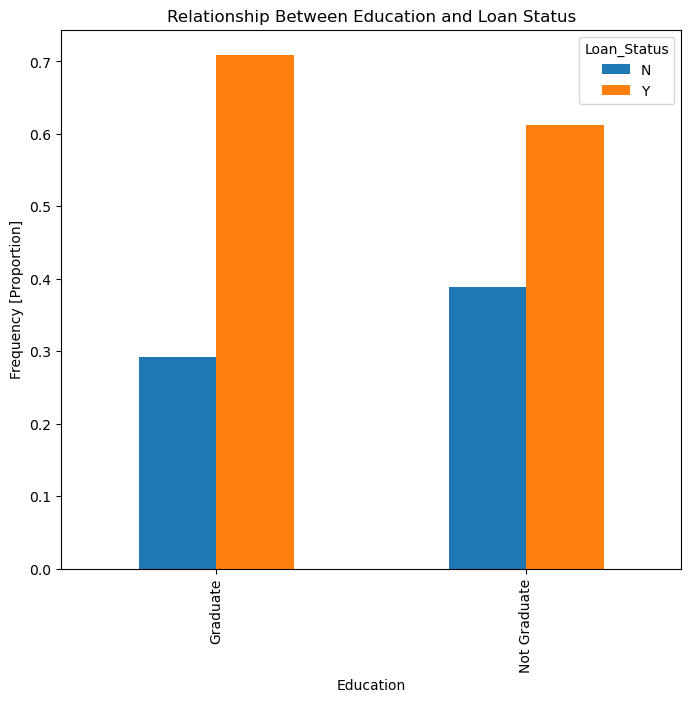

In [30]:
mask = pd.crosstab(df["Education"], df["Loan_Status"]).apply(lambda x: x/x.sum(), axis=1)
mask.plot.bar(figsize=(8, 7))
plt.title("Relationship Between Education and Loan Status")
plt.xlabel("Education")
plt.ylabel("Frequency [Proportion]");

Concerning the Education feature. We can postulate that there is a little relation as we see a little bump for applicants that are graudate versus applicants that are not.

### Self Employed VS Loan Status

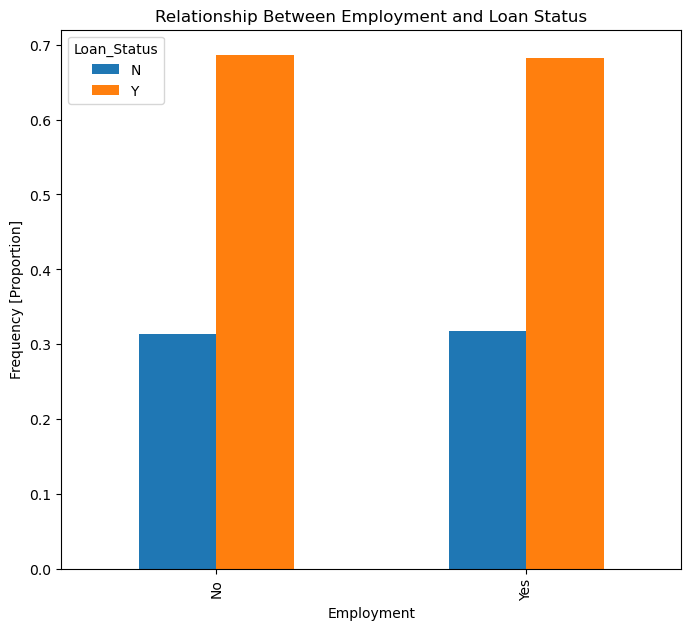

In [31]:
mask = pd.crosstab(df["Self_Employed"], df["Loan_Status"]).apply(lambda x: x/x.sum(), axis=1)
mask.plot.bar(figsize=(8, 7))
plt.title("Relationship Between Employment and Loan Status")
plt.xlabel("Employment")
plt.ylabel("Frequency [Proportion]");

There is no relationship concerning employment status and loan status. As we can see that there is a balance in the feature.

### Applicant Income VS Loan Status.

In [32]:
df[df["ApplicantIncome"]< 5e5]["ApplicantIncome"]

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

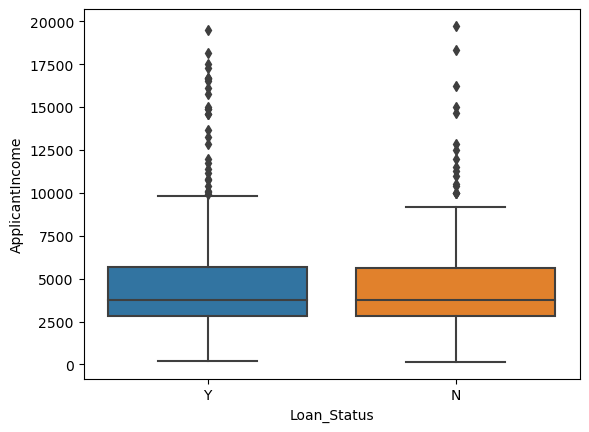

In [33]:
sns.boxplot(data=df, x= "Loan_Status", y=(df[df["ApplicantIncome"]< 2e4]["ApplicantIncome"]));

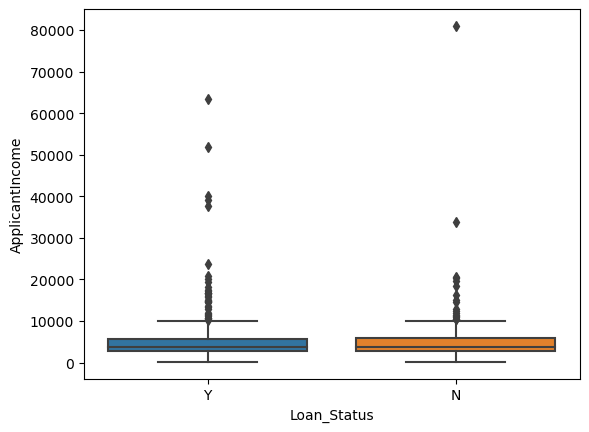

In [34]:
sns.boxplot(data=df, x= "Loan_Status", y=(df["ApplicantIncome"]));

We can see that Applicant income doesn't really determine maybe the applicant will be granted a loan or not.

### Co- Applicant VS Income

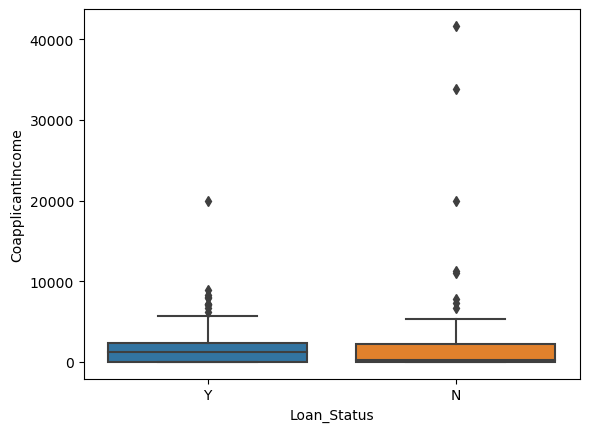

In [35]:
sns.boxplot(data=df, x= "Loan_Status", y=df["CoapplicantIncome"]);

Due to the spread as well. We can't really obtain much insights. Let us mask the Co-applicant income feature. We will mask it to less than \\$6k.

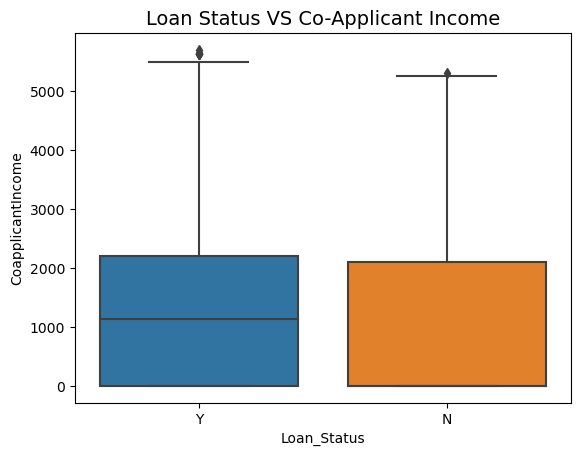

In [36]:
sns.boxplot(data=df, x= "Loan_Status", y=df[df["CoapplicantIncome"] < 6e3]["CoapplicantIncome"])
plt.title("Loan Status VS Co-Applicant Income", size=14);

We can see that there  isn't relationship concerning Co-applicant income and loan status as well. Also interesting to see that 50% of coapplicant who had been granted loan earn below. Why for co-applicants not granted loan earn nothing.

### Loan Amount VS Loan Status.

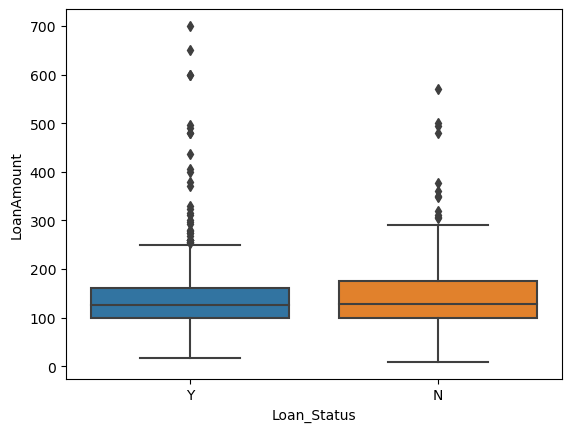

In [37]:
sns.boxplot(data=df, x= "Loan_Status", y="LoanAmount");

Also concerning the amount of loan requested by applicants does not determine if they will be given or not. I.e. if a loan amount is small doesn't determine that the applicant will be granted.

### Loan_Amount_Term VS Loan Status.

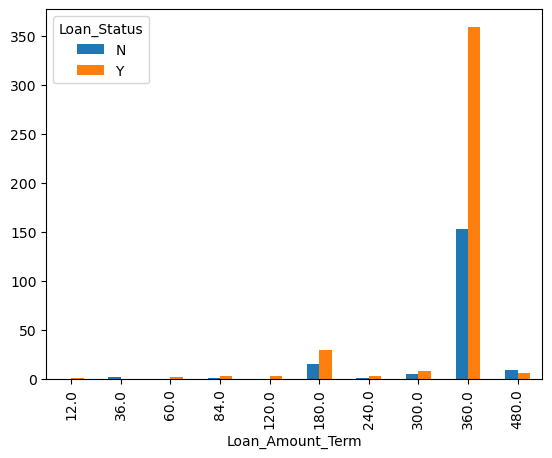

In [38]:
mask=pd.crosstab(df["Loan_Amount_Term"], df["Loan_Status"])
mask.plot.bar();

### Credit History VS loan Status

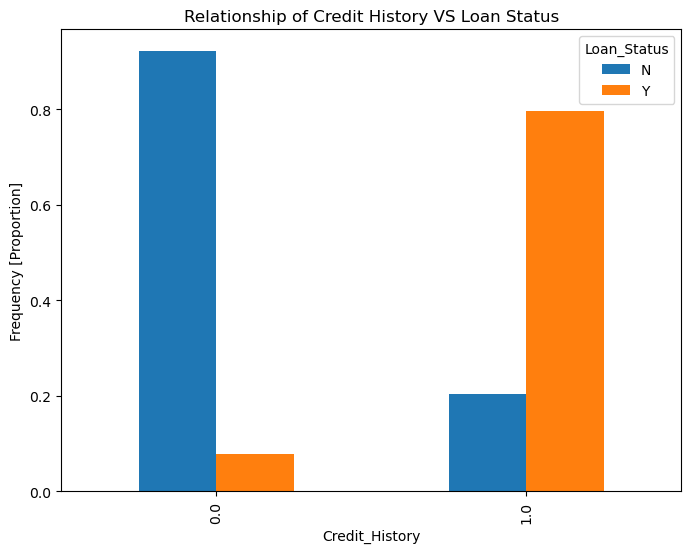

In [39]:
mask = pd.crosstab(df["Credit_History"], df["Loan_Status"]).apply(lambda x:x/x.sum(), axis=1)
mask.plot.bar(figsize=(8, 6))
plt.title("Relationship of Credit History VS Loan Status")
plt.ylabel("Frequency [Proportion]");

From the above summary, it is seen that close to 80% of customers who had credit history were granted the loan, so we can denote that credit history is the key indicator feature that will guarantee a customer loan or not.

### Property Area VS Loan Status.

In [40]:
df2 = pd.crosstab(df["Property_Area"], df["Loan_Status"]).apply(lambda x: x/x.sum(), axis=1)
df2

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416

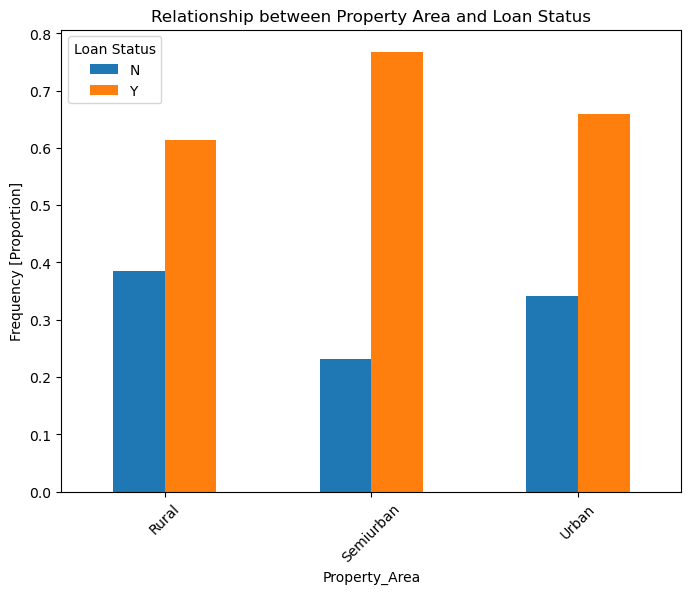

In [41]:
df2.plot.bar(figsize=(8, 6))
plt.title("Relationship between Property Area and Loan Status")
plt.ylabel("Frequency [Proportion]")
plt.xticks(rotation=45)
plt.legend(title = "Loan Status", loc="upper left");

We can see that most applicants that are granted loan resides has their property in the semi urban area. Above 70% of applicants that have their propety there was granted loan.

## Multivariate Analysis.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Gender VS Applicant Income VS Loan Status

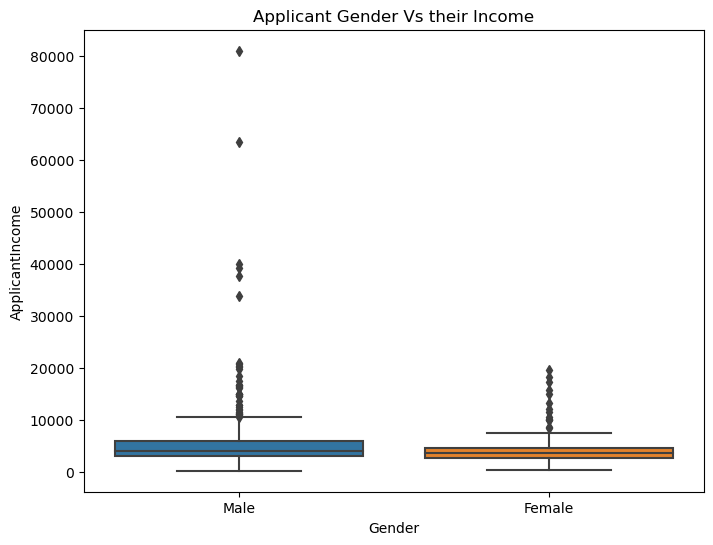

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gender", y="ApplicantIncome")
plt.title("Applicant Gender Vs their Income");

We can see from the above summary that the male applicant are the one who earn a lot of income than the female.

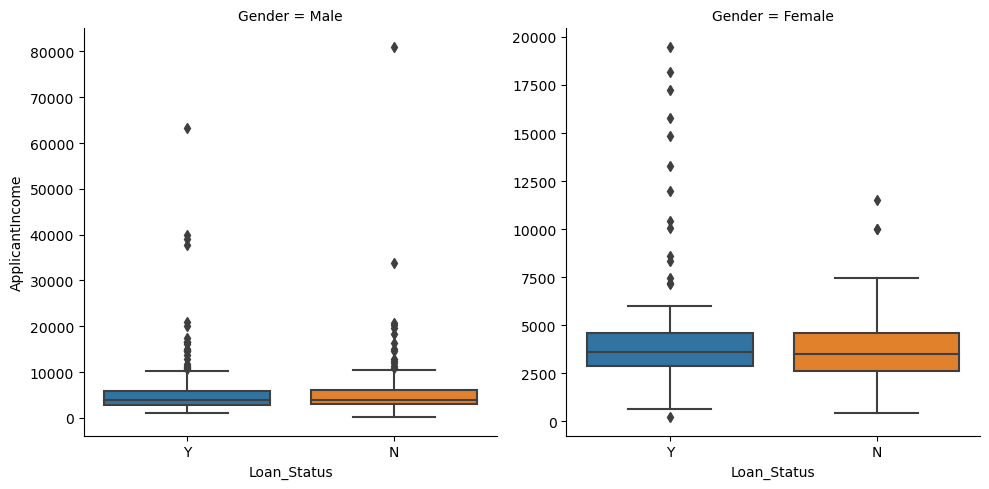

In [44]:
sns.catplot(data=df, x = "Loan_Status", y="ApplicantIncome", col="Gender", kind="box", sharey=False);

We can see from the above summary that we have males that earn a lot of income and we can see that these factor does not determine whether a male customer will be granted a loan.

Also the females earn less and also their income does not determine if they will be granted a loan.

## Education VS ApplicantIncome VS Loan Status.

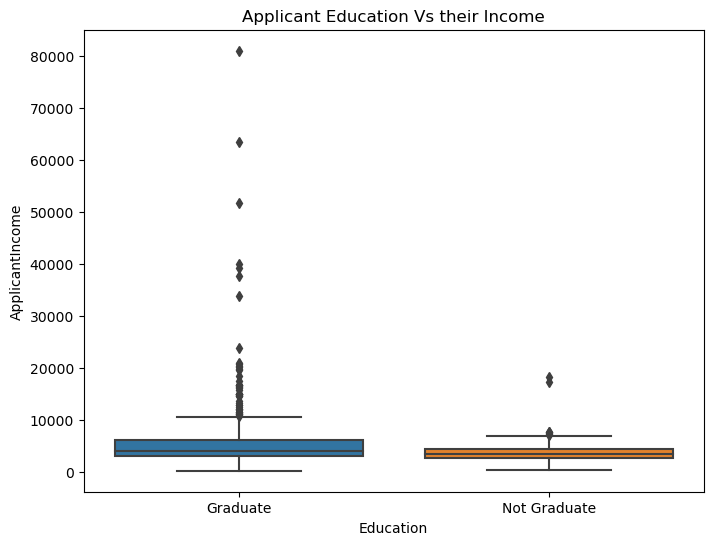

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Education", y="ApplicantIncome")
plt.title("Applicant Education Vs their Income");

We can see also from the above summary that. Applicant with graudate education status earns a lot of money than those who are not graduate.

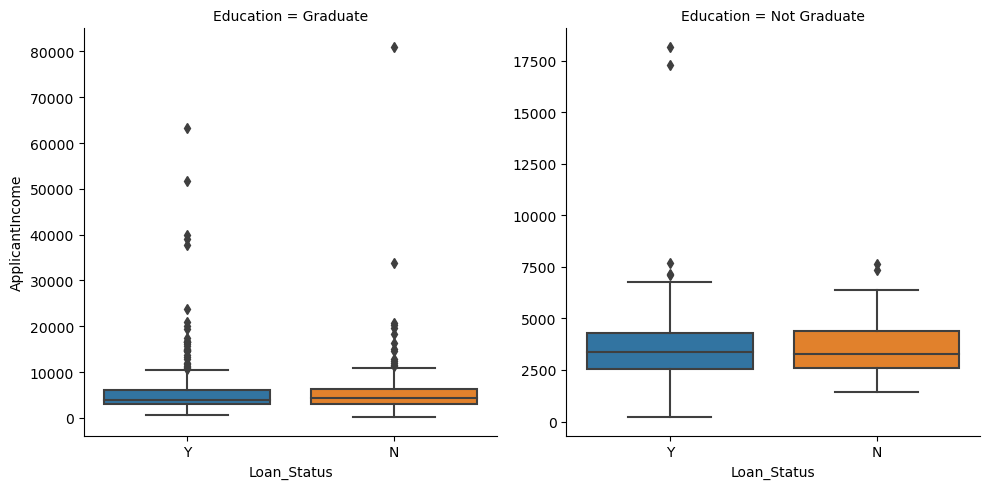

In [46]:
sns.catplot(data=df, x = "Loan_Status", y="ApplicantIncome", col="Education", kind="box", sharey=False);

Also there is no relationship concerning customer education status income and loan status.

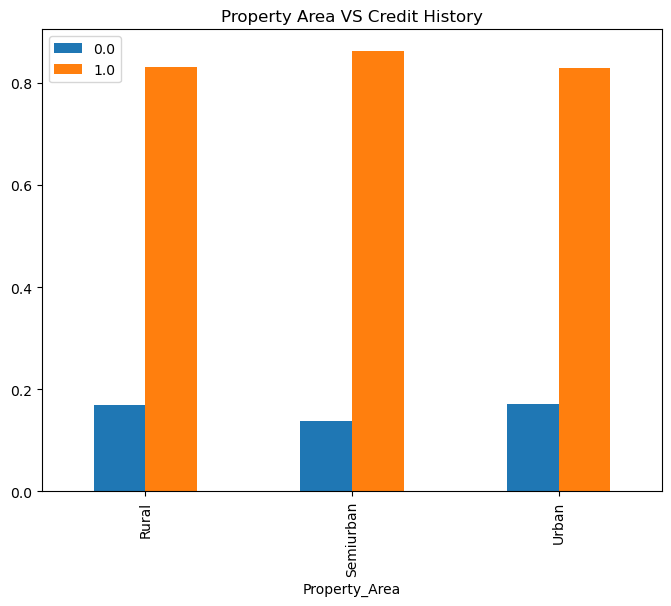

In [47]:
mask = pd.crosstab(df["Property_Area"], df["Credit_History"]).apply(lambda x: x/x.sum(), axis=1)
mask.plot.bar(figsize=(8, 6))
plt.legend(loc="upper left")
plt.title("Property Area VS Credit History");

We can see from the above summary the factor that was making semi urban area have more chances of getting loan than other area is because

* Most customers have their property around the semi urban area
* Also most customer who had credit history reside most in the semi urban area.

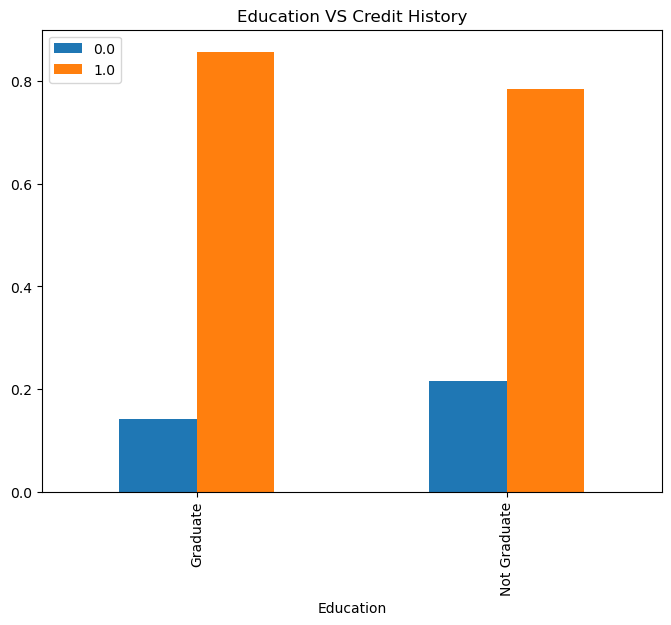

In [48]:
mask = pd.crosstab(df["Education"], df["Credit_History"]).apply(lambda x: x/x.sum(), axis=1)
mask.plot.bar(figsize=(8, 6))
plt.legend(loc="upper left")
plt.title("Education VS Credit History");

We can see from the above summary the factor that was making graduate have more chances of getting loan than non graduate is because Most graduates have more credit history than non graduate.

Credit_History       0.0       1.0
Married                           
No              0.160804  0.839196
Yes             0.157459  0.842541


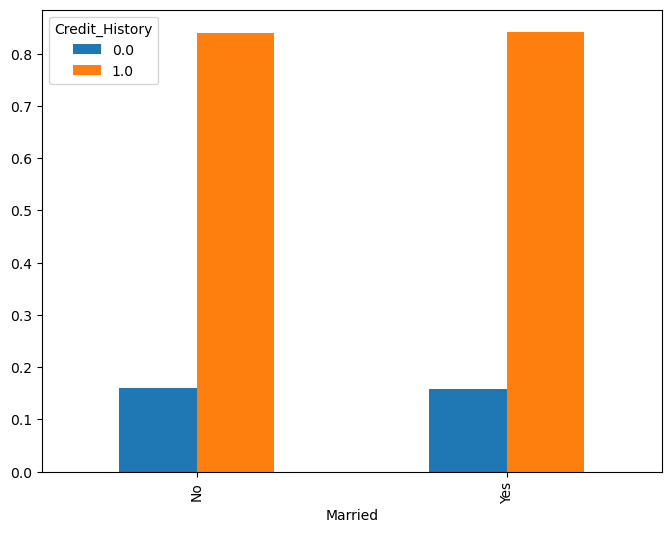

In [49]:
mask = pd.crosstab(df["Married"], df["Credit_History"]).apply(lambda x: x/x.sum(), axis=1)
print(mask)
mask.plot.bar(figsize=(8, 6));

We can see from the above summary that one of the reason of people with marital status having more chances of etting loan than others is because there is 1% significant increase. I.e. People who are married and have a credit history are 1% more than those who aren't married and have a credit history. 

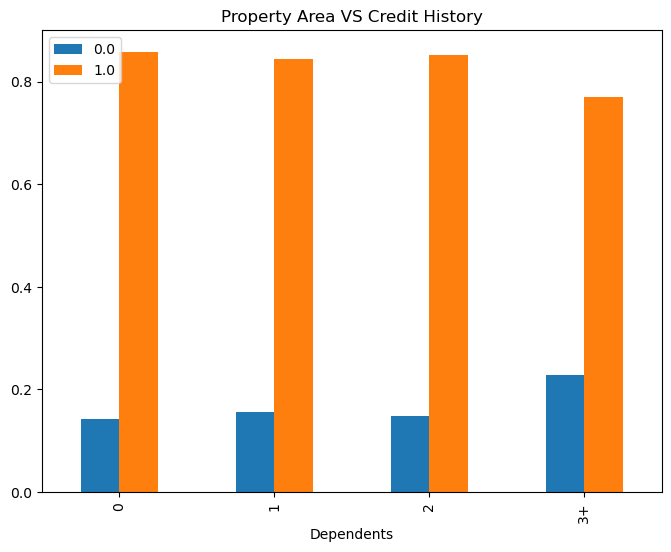

In [50]:
mask = pd.crosstab(df["Dependents"], df["Credit_History"]).apply(lambda x: x/x.sum(), axis=1)
mask.plot.bar(figsize=(8, 6))
plt.legend(loc="upper left")
plt.title("Property Area VS Credit History");

## Applicant Income VS Credit History


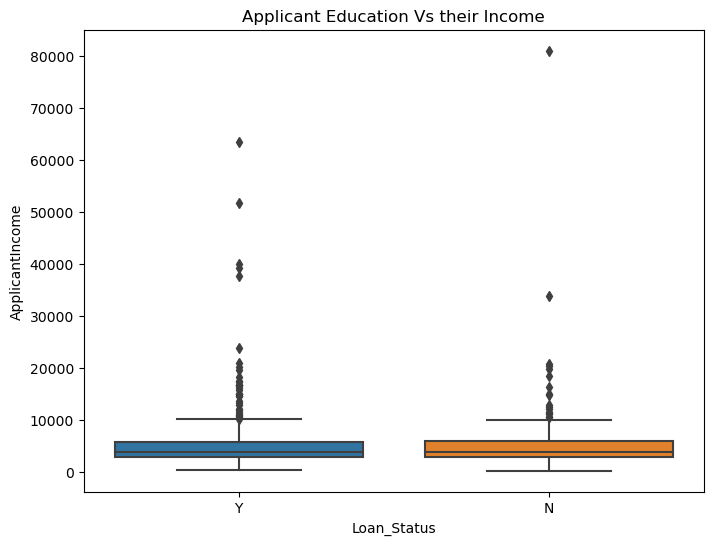

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Loan_Status", y=(df["ApplicantIncome"]))
plt.title("Applicant Education Vs their Income");

# Conclusion From EDA

From the EDA we were able to deduce a key metric i.e. a feature that increases the chances of customer getting a loan is when a customer has a credit history.

# Modelling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score, classification_report, log_loss
from catboost import CatBoostClassifier

In [53]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [54]:
df.set_index("Loan_ID", inplace=True)

In [55]:

df["Gender"] = df["Gender"].map({"Male":1, "Female":0})
df["Married"] = df["Married"].map({"Yes":1, "No":0})
df["Self_Employed"] = df["Self_Employed"].map({"Yes":1, "No":0})
df["Education"] = df["Education"].map({"Graduate":1, "Not Graduate":0})
df["Property_Area"] = df["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban":2})


df["Loan_Status"] = df["Loan_Status"].map({"Y":1, "N":0})

In [56]:
## Fill the Dependent feature missing values.
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0]) 
one = OneHotEncoder(use_cat_names=True, cols = ["Dependents"])
df_encode = one.fit_transform(df)

In [57]:
X = df_encode.drop(columns = ["Loan_Status"])
y = df_encode["Loan_Status"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
X_train

Gender  Married  Dependents_0  Dependents_1  Dependents_2  \
Loan_ID                                                               
LP001535     1.0      0.0             1             0             0   
LP001792     1.0      1.0             0             1             0   
LP002443     1.0      1.0             0             0             1   
LP002517     1.0      1.0             0             1             0   
LP001894     1.0      1.0             1             0             0   
...          ...      ...           ...           ...           ...   
LP001744     1.0      0.0             1             0             0   
LP002138     1.0      1.0             1             0             0   
LP001068     1.0      1.0             1             0             0   
LP001327     0.0      1.0             1             0             0   
LP002143     0.0      1.0             1             0             0   

          Dependents_3+  Education  Self_Employed  ApplicantIncome  \
Loan_ID                                                              
LP001535              0          1            0.0             3254   
LP001792              0          1            0.0             3315   
LP002443              0          1            0.0             3340   
LP002517              0          0            0.0             2653   
LP001894              0          1            0.0             2620   
...                 ...        ...            ...              ...   
LP001744              0          1            0.0             2971   
LP002138              0          1            0.0             2625   
LP001068              0          1            0.0             2799   
LP001327              0          1            0.0             2484   
LP002143              0          1            0.0             2423   

          CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
Loan_ID                                                                     
LP001535                0.0        50.0             360.0             1.0   
LP001792                0.0        96.0             360.0             1.0   
LP002443             1710.0       150.0             360.0             0.0   
LP002517             1500.0       113.0             180.0             0.0   
LP001894             2223.0       150.0             360.0             1.0   
...                     ...         ...               ...             ...   
LP001744             2791.0       144.0             360.0             1.0   
LP002138             6250.0       187.0             360.0             1.0   
LP001068             2253.0       122.0             360.0             1.0   
LP001327             2302.0       137.0             360.0             1.0   
LP002143              505.0       130.0             360.0             1.0   

          Property_Area  
Loan_ID                  
LP001535              2  
LP001792              1  
LP002443              0  
LP002517              0  
LP001894              1  
...                 ...  
LP001744              1  
LP002138              0  
LP001068              1  
LP001327              1  
LP002143              1  

[491 rows x 14 columns]

In [60]:
df.isna().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
X_train.columns

Index(['Gender', 'Married', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [62]:
num_attributes = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
cat_attributes = ["Gender", "Married", "Self_Employed", "Loan_Amount_Term", "Credit_History", "Property_Area"]

column_org = ColumnTransformer(
    transformers=[
        ("not_transformed", "passthrough", ['Dependents_0', 'Dependents_1', 'Dependents_2', "Dependents_3+", "Education"]),
        ("cat_attrb", SimpleImputer(strategy="most_frequent"), cat_attributes),
        ("num_attrb", SimpleImputer(strategy="median"), num_attributes),
    ],
    remainder= "passthrough"
)

In [63]:
algorithms = [CatBoostClassifier(silent=True, random_state=42), RandomForestClassifier(random_state=42), DecisionTreeClassifier(random_state=42)]

In [64]:
log = []
score = []
for alg in algorithms:
    clf = make_pipeline(
        column_org,
        alg)
    clf.fit(X_train, y_train)
    log.append(log_loss(y_test, clf.predict(X_test)))
    score.append(accuracy_score(y_test, clf.predict(X_test)))

metrics = {"Model": ["Catboost", "RandomForest", "DecisionTree"], "Logloss":log, "Accuracy Score": score}

result = pd.DataFrame(metrics)

C:\Users\admin\Miniconda\envs\GeekEnv\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\admin\Miniconda\envs\GeekEnv\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

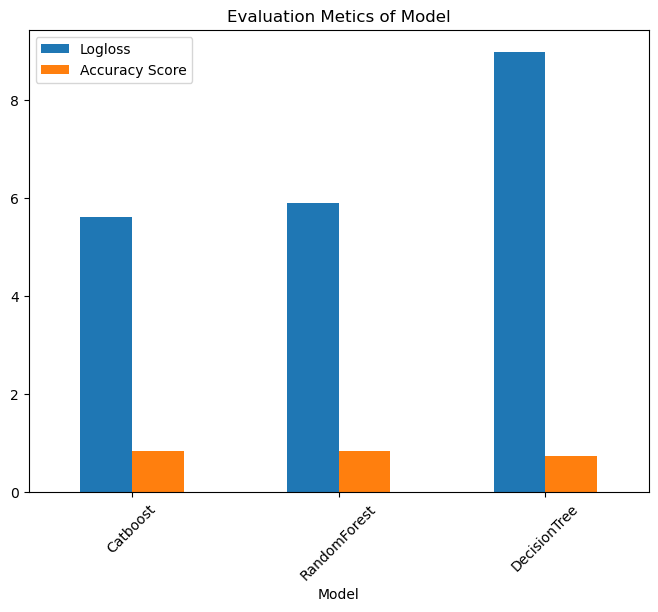

In [65]:
result.plot.bar(x = "Model", figsize=(8, 6))
plt.xticks(rotation=45)
plt.title("Evaluation Metics of Model");

We can see that from the above summary the Catboost Classifier was the best of all. So we are going to leverage that in building our model.

In [66]:
result

Model   Logloss  Accuracy Score
0      Catboost  5.616159        0.837398
1  RandomForest  5.896962        0.829268
2  DecisionTree  8.985795        0.739837

We will make use of catboost for our modelling.

In [67]:
clf =  Pipeline(
    steps=[('column_org',column_org),
           ('model', CatBoostClassifier(silent=True))
])
clf.fit(X_train, y_train)

C:\Users\admin\Miniconda\envs\GeekEnv\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Pipeline(steps=[('column_org',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('not_transformed',
                                                  'passthrough',
                                                  ['Dependents_0',
                                                   'Dependents_1',
                                                   'Dependents_2',
                                                   'Dependents_3+',
                                                   'Education']),
                                                 ('cat_attrb',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Gender', 'Married',
                                                   'Self_Employed',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
      

In [68]:
index = ['Dependents_0', 'Dependents_1', 'Dependents_2', "Dependents_3+", "Education"] + cat_attributes + num_attributes

In [69]:
len(index)

14

In [70]:
feature_imp = pd.Series(index=index, data=clf.named_steps["model"].feature_importances_).sort_values()

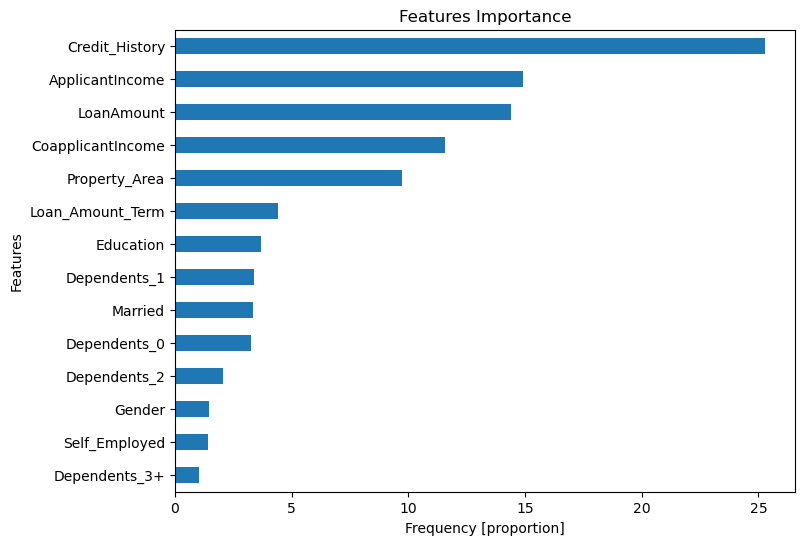

In [71]:
feature_imp.plot.barh(figsize=(8, 6))
plt.title("Features Importance")
plt.ylabel("Features")
plt.xlabel("Frequency [proportion]");

From the above summary it is seen that credit history had contributed to the model close to 25%. Also followed ApplicantIncome, Loan Amount, etc.

# Full Conclusion From ML model.

According to the above summary, the essential factors for driving a client's success in acquiring a loan include if the customer has a credit history, earns a decent salary, and owns property in a semi-urban location, among other things.

In [72]:
print(f"The accuracy Score for the above model is {round(accuracy_score(y_test, clf.predict(X_test)), 2)* 100}%.")

The accuracy Score for the above model is 84.0%.


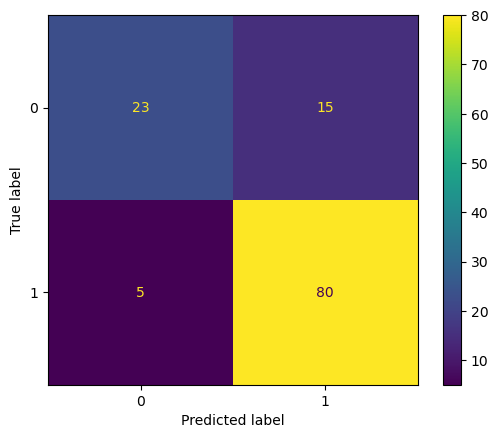

In [73]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

In [74]:
f1_score(y_test, clf.predict(X_test))

0.8888888888888888

Our model is okay in terms of making correct desision and making all the prediction. There is less false positive.

In [75]:
import pickle

In [76]:
with open("model.pkl", "wb") as file:
    pickle.dump(clf, file)